In [1]:
from datasets import load_from_disk

/leonardo_scratch/fast/IscrC_MOSES/nicola/miniconda3/envs/llavart/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_from_disk("../data/wikifragments_visual_arts_dataset_embeds")
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'url', 'wiki_id', 'paragraph_id', 'images', 'fragment', 'embedding', 'vcount', 'pooled_embedding'],
        num_rows: 5651060
    })
})

In [ ]:
# ...existing code...

def count_images(example):
    num_images = len(example["images"]["image"])
    return {"num_images": num_images}

ds = ds.remove_columns( ['id', 'title', 'text', 'url', 'wiki_id', 'paragraph_id', 'fragment', 'vcount', 'pooled_embedding'])
mapped = ds.map(count_images, num_proc=8)
# Example usage with ds.map (multiprocessing enabled):
# mapped = ds.map(count_images, num_proc=4)
# To aggregate:


# ...existing code...

In [ ]:
mapped = mapped.remove_columns(['images'])

In [ ]:
from collections import Counter
counts = Counter(mapped["train"]["num_images"])
print(counts)

In [ ]:
for i, x in enumerate(mapped["train"]["num_images"]):
    if x == 93:
        print(i)
        break

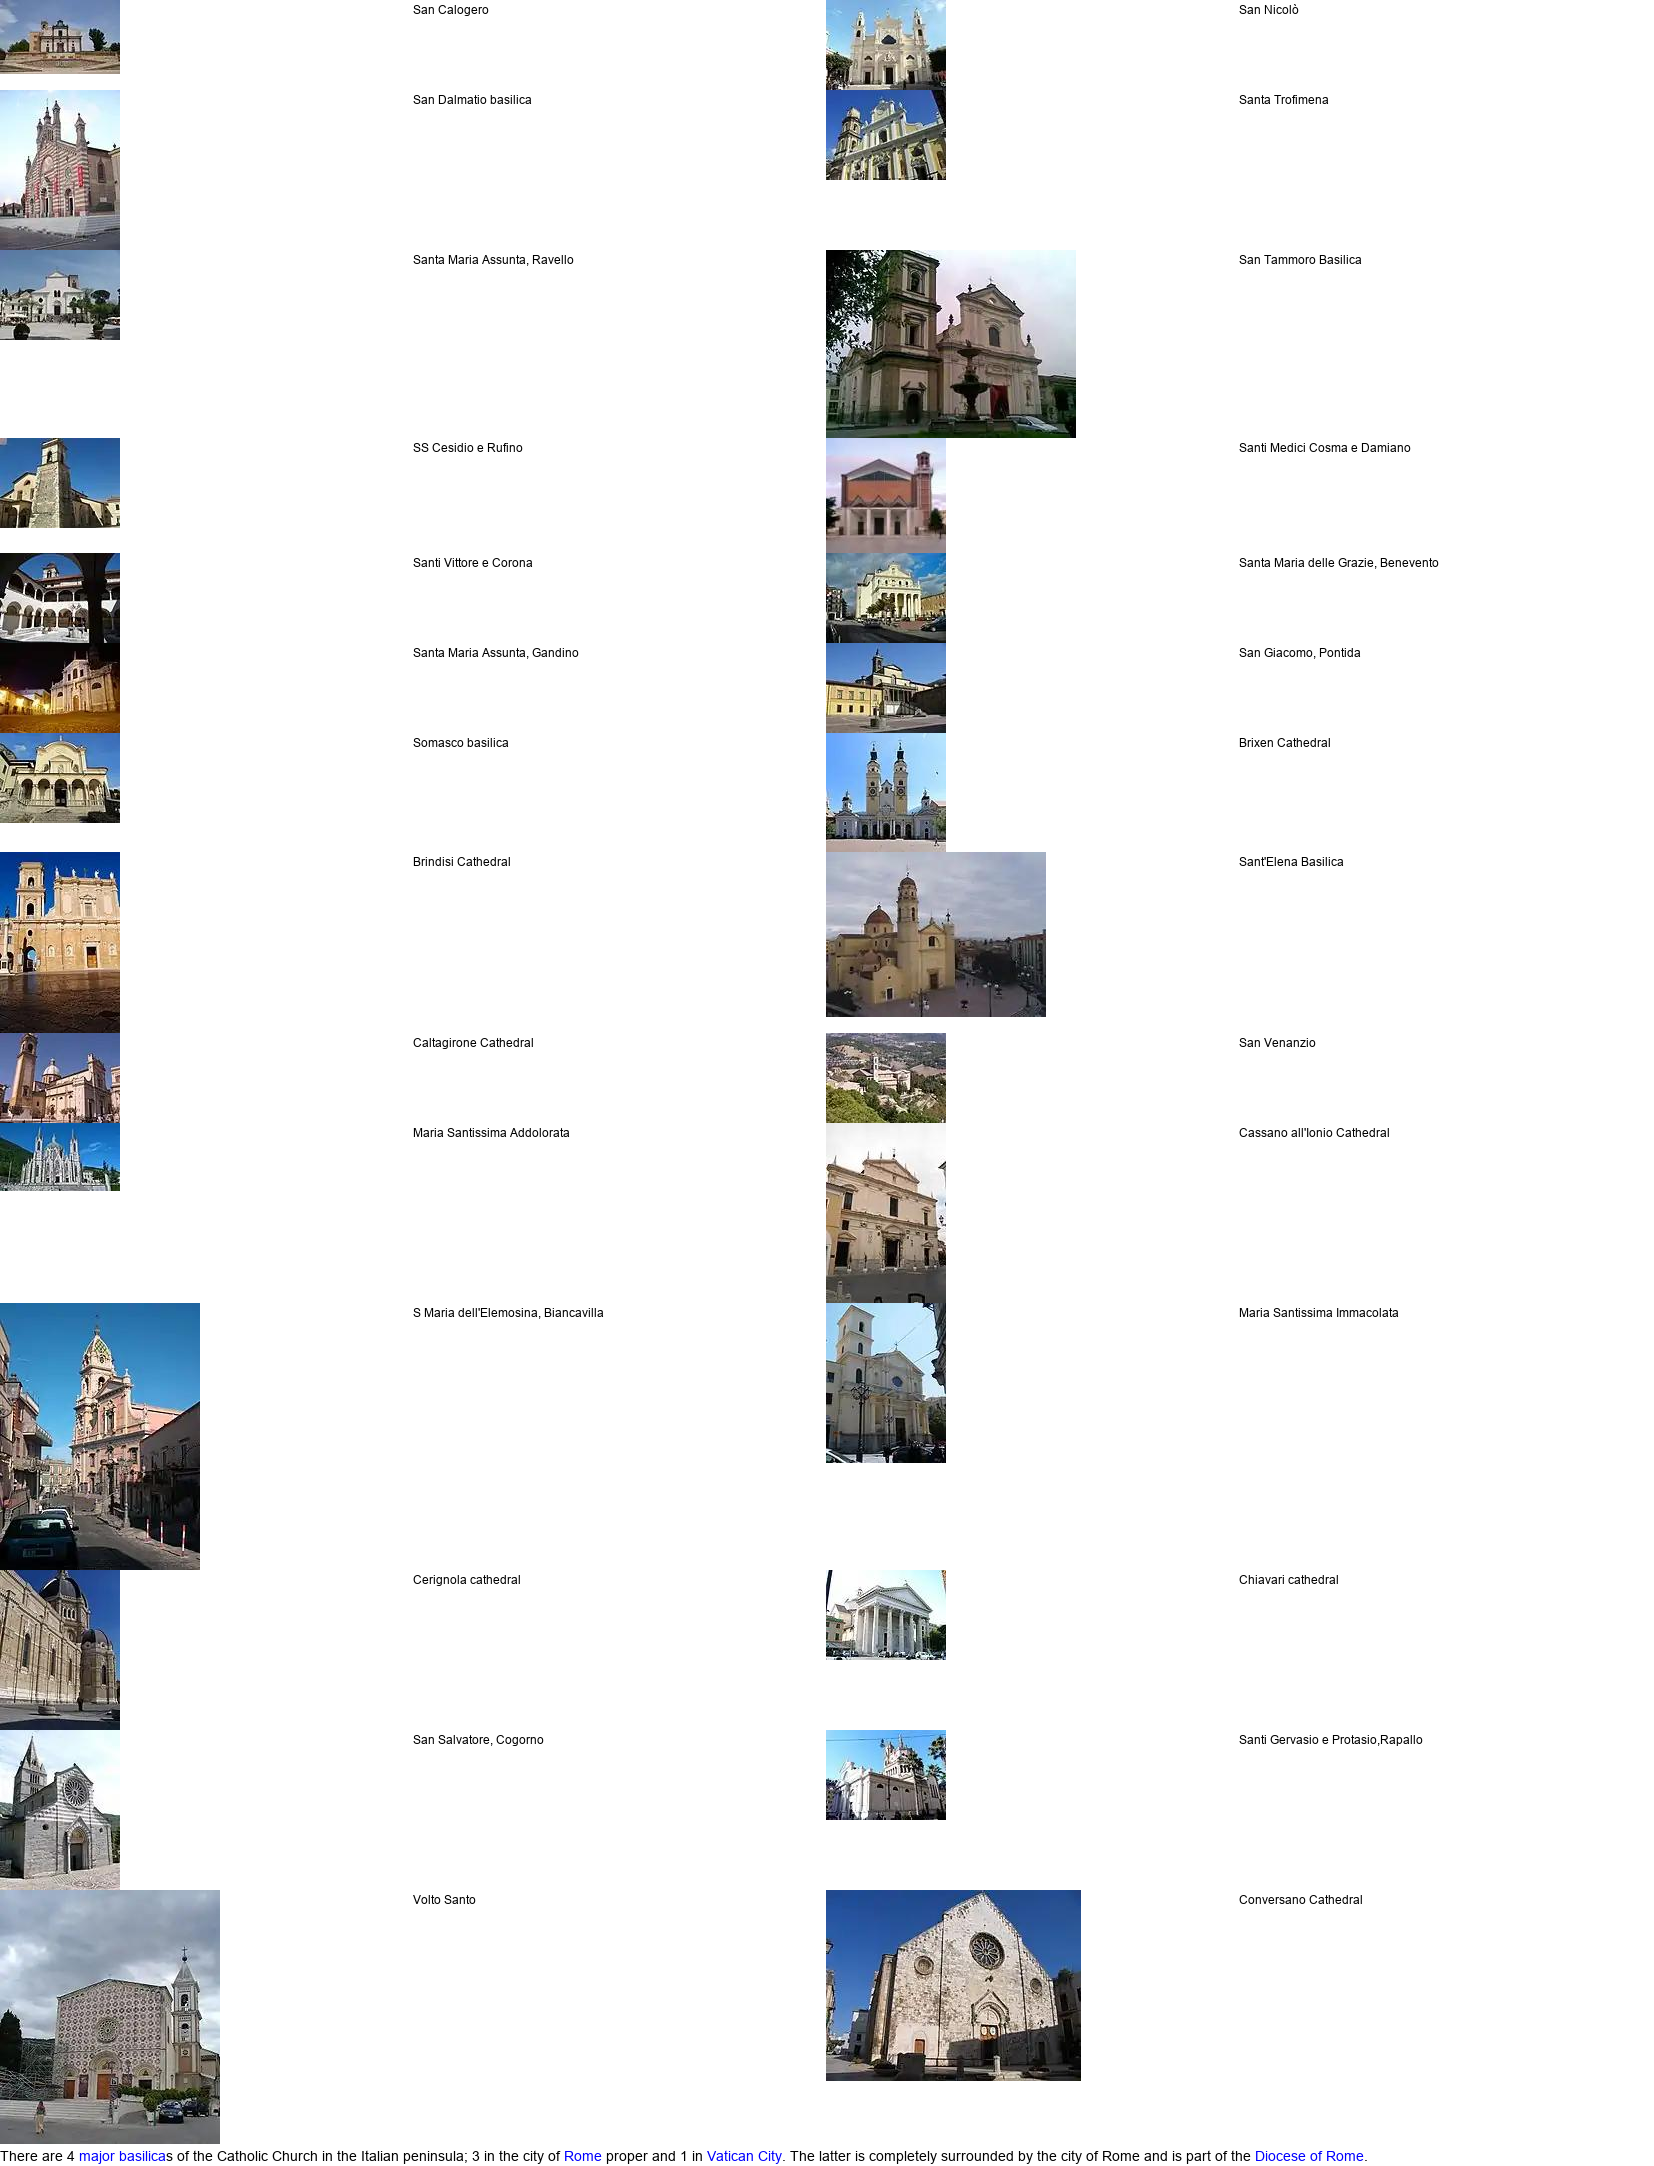

In [3]:
ds["train"][5366738]["fragment"]

In [4]:
d = {0: 5233635, 1: 386583, 2: 23994, 3: 4634, 4: 1291, 5: 492, 6: 196, 7: 82, 8: 43, 9: 34, 10: 17, 11: 12, 13: 12, 12: 8, 14: 6, 16: 3, 22: 3, 18: 3, 17: 2, 31: 2, 38: 1, 23: 1, 21: 1, 29: 1, 42: 1, 20: 1, 45: 1, 93: 1}

In [8]:
len(ds["train"])

5651060

In [9]:
5651060 - 5233635

417425

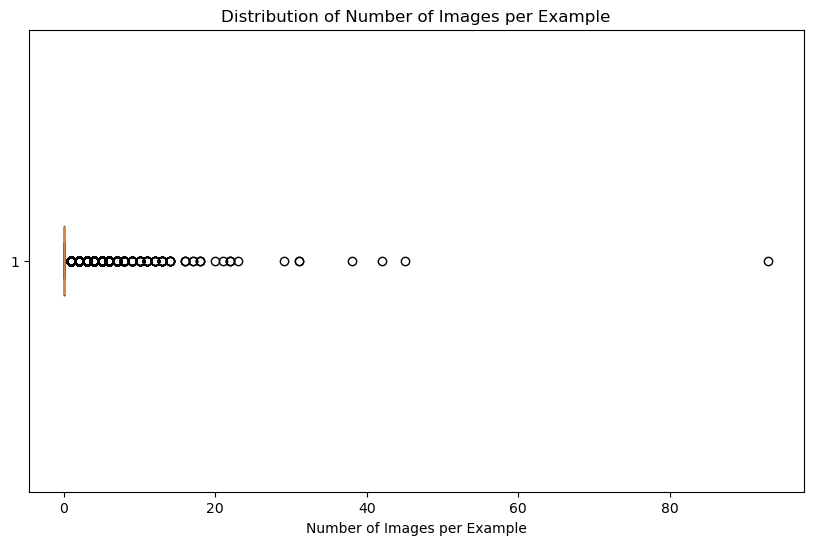

In [5]:
# ...existing code...

import matplotlib.pyplot as plt

# Convert the dictionary to a list with repeated values according to their counts
data = []
for num_images, count in d.items():
    data.extend([num_images] * count)

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.xlabel("Number of Images per Example")
plt.title("Distribution of Number of Images per Example")
plt.show()

# ...existing code...

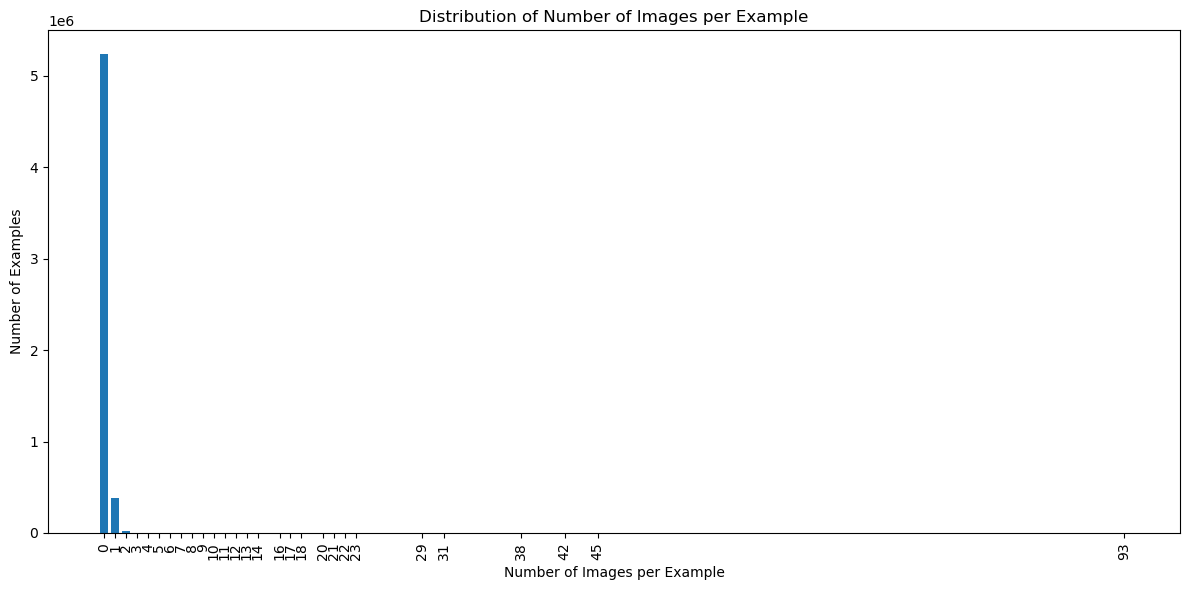

In [6]:
# ...existing code...

import matplotlib.pyplot as plt

# Prepare data for bar plot
keys = sorted(d.keys())
values = [d[k] for k in keys]

plt.figure(figsize=(12, 6))
plt.bar(keys, values)
plt.xlabel("Number of Images per Example")
plt.ylabel("Number of Examples")
plt.title("Distribution of Number of Images per Example")
plt.xticks(keys, rotation=90)
plt.tight_layout()
plt.show()

# ...existing code...